In [1]:
import os
import sys

import numpy as np
from skimage import io

# Get the parent directory
parent_dir = os.path.dirname(os.path.realpath("../"))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

from torch.utils.data import DataLoader

from data import AOSDataset
from utils import plot_dataset, plot_dataloader
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import l1_loss

import cv2

In [2]:
G_SCENARIO = 1
G_DATSET_MAX_SIZE = None  # for speed we reduce the dataset size, enter None for all data.

# use small test set in the beginning to validate that the code is working.
G_TRAIN_SET_RATIO = 0.5
G_TEST_SET_RATIO = 1 - G_TRAIN_SET_RATIO
assert (G_TEST_SET_RATIO + G_TRAIN_SET_RATIO) <= 1.0, 'Test and Train set split invalid'

# choose data set location
G_DATASET_LOCATION = "../../data/aos-data/focalstack-1/train"
# G_DATASET_LOCATION = "../../../focal_dataset"

#####################################
# Training settings
G_BATCH_SIZE = 128
G_LEARNING_RATE = 0.001

In [3]:
dataset = AOSDataset(
    G_DATASET_LOCATION,
    relative_path=True,
    maximum_datasize=G_DATSET_MAX_SIZE,
    # patch_size=(109, 109)
)

print(dataset.__len__())

26811


In [4]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [6]:
wrong = 0

for idx, (feature, label, mask) in enumerate(dataloader):
    if mask.numpy().mean() > 0.1:
        wrong += 1
        print(idx)

KeyboardInterrupt: 

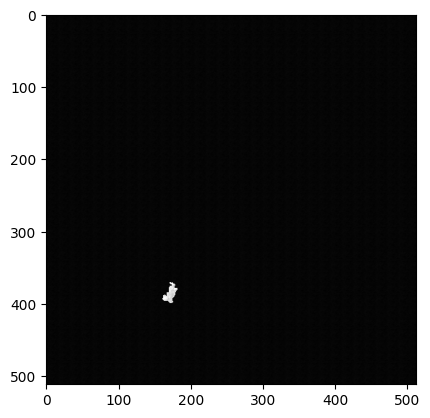

In [11]:
feature, ground_truth, mask = dataset[127]

plt.imshow(ground_truth.permute(1, 2, 0), cmap='gray', vmin=0, vmax=1)

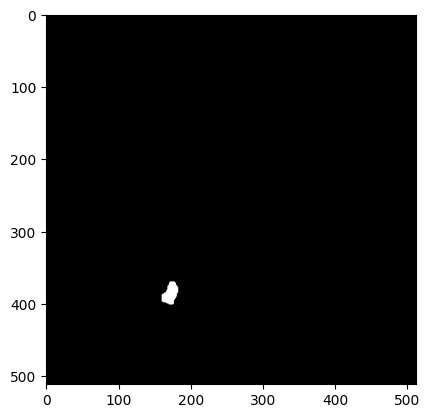

In [12]:
plt.imshow(mask.permute(1, 2, 0), cmap='gray', vmin=0, vmax=1)

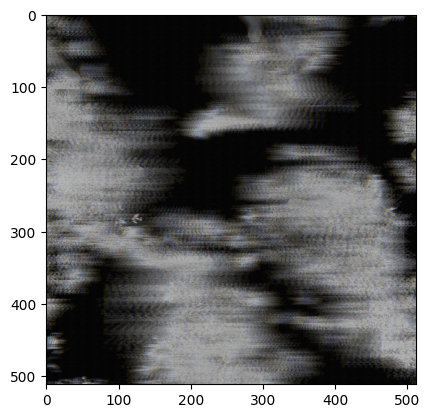

In [13]:
plt.imshow(feature.permute(1, 2, 0), cmap='gray', vmin=0, vmax=1)

In [128]:
mask.numpy().mean()

0.0021133423

In [8]:
feature, label, mask = next(iter(dataloader))
print(feature.shape)
print(label.shape)
print(mask.shape)

torch.Size([1, 3, 512, 512])
torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])


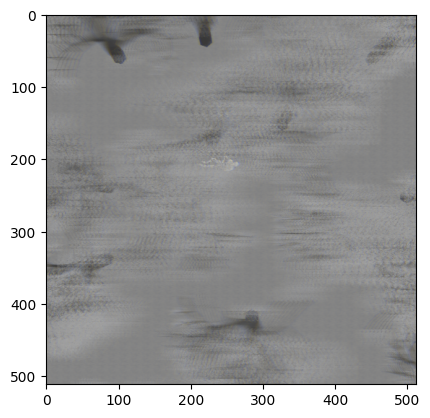

In [9]:
plt.imshow(feature[0].permute(1, 2, 0), cmap='gray')

In [10]:
feature[0]

tensor([[[0.5373, 0.5333, 0.5490,  ..., 0.5216, 0.4980, 0.5373],
         [0.5529, 0.5647, 0.5529,  ..., 0.4863, 0.4980, 0.5451],
         [0.5569, 0.5294, 0.5373,  ..., 0.4784, 0.4627, 0.5333],
         ...,
         [0.5176, 0.5216, 0.5216,  ..., 0.5137, 0.4902, 0.5333],
         [0.5137, 0.5137, 0.5176,  ..., 0.5098, 0.5098, 0.5059],
         [0.5098, 0.5137, 0.5176,  ..., 0.4863, 0.5020, 0.5333]],

        [[0.5294, 0.5412, 0.5686,  ..., 0.5294, 0.5059, 0.5412],
         [0.5569, 0.5608, 0.5608,  ..., 0.4784, 0.5098, 0.5294],
         [0.5608, 0.5137, 0.5490,  ..., 0.4941, 0.4902, 0.4941],
         ...,
         [0.5176, 0.5216, 0.5216,  ..., 0.5490, 0.4824, 0.5137],
         [0.5098, 0.5137, 0.5176,  ..., 0.5137, 0.5216, 0.5020],
         [0.5137, 0.5176, 0.5176,  ..., 0.4941, 0.4980, 0.5373]],

        [[0.5333, 0.5882, 0.5843,  ..., 0.5176, 0.5216, 0.5529],
         [0.5333, 0.5647, 0.5569,  ..., 0.5216, 0.4902, 0.5373],
         [0.5373, 0.5255, 0.5412,  ..., 0.5137, 0.5373, 0.

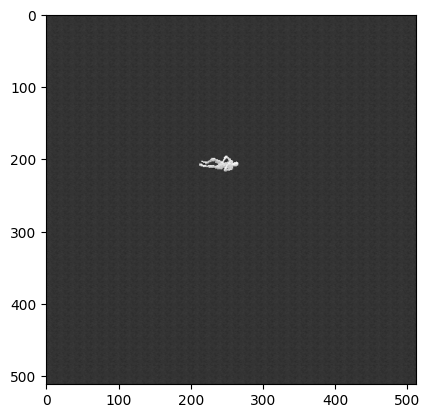

In [11]:
plt.imshow(label[0].permute(1, 2, 0), cmap='gray')

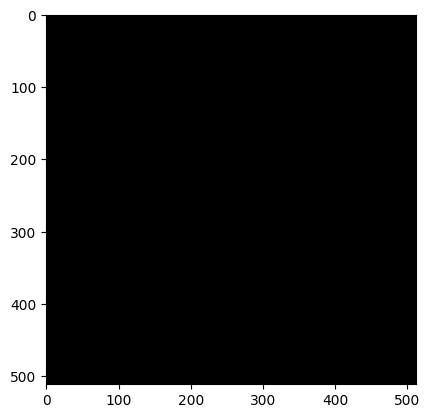

In [12]:
plt.imshow(mask[0].permute(1, 2, 0), cmap='gray')

In [123]:
(mask.numpy() == 1).mean()

0.00211334228515625

In [14]:
l1 = torch.abs(feature - label)
l1

tensor([[[[0.0314, 0.0157, 0.0275,  ..., 0.0039, 0.0118, 0.0275],
          [0.0471, 0.0471, 0.0275,  ..., 0.0353, 0.0157, 0.0275],
          [0.0510, 0.0196, 0.0235,  ..., 0.0431, 0.0588, 0.0196],
          ...,
          [0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0235, 0.0235],
          [0.0000, 0.0039, 0.0000,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0039, 0.0000,  ..., 0.0353, 0.0196, 0.0196]],

         [[0.0235, 0.0235, 0.0471,  ..., 0.0118, 0.0039, 0.0314],
          [0.0510, 0.0431, 0.0353,  ..., 0.0431, 0.0039, 0.0118],
          [0.0549, 0.0039, 0.0353,  ..., 0.0275, 0.0314, 0.0196],
          ...,
          [0.0000, 0.0039, 0.0000,  ..., 0.0392, 0.0314, 0.0039],
          [0.0039, 0.0039, 0.0000,  ..., 0.0078, 0.0039, 0.0078],
          [0.0000, 0.0078, 0.0000,  ..., 0.0275, 0.0235, 0.0235]],

         [[0.0275, 0.0706, 0.0627,  ..., 0.0000, 0.0118, 0.0431],
          [0.0275, 0.0471, 0.0314,  ..., 0.0000, 0.0235, 0.0196],
          [0.0314, 0.0157, 0.0275,  ..., 0

In [15]:
weight = (mask * 0.3) + 1
weight = weight

In [16]:
weight.shape

torch.Size([1, 1, 512, 512])

In [17]:
weight[:, 1, :, :].mean()

IndexError: index 1 is out of bounds for dimension 1 with size 1

In [18]:
(l1 * weight).mean()

tensor(0.0334)

In [19]:
l1_loss(feature, label)

/tmp/ipykernel_20030/2355836968.py:1: UserWarning: Using a target size (torch.Size([1, 1, 512, 512])) that is different to the input size (torch.Size([1, 3, 512, 512])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  l1_loss(feature, label)


tensor(0.0334)

In [82]:
img = cv2.imread(
    '/home/christopherschicho/projects/AOS-ImageRestoration/data/aos-data/focalstack-1/test/batch_20230912_part2_GT/0_5502_GT_pose_0_thermal.png',
    cv2.IMREAD_GRAYSCALE)

img = io.imread(
    '/home/christopherschicho/projects/AOS-ImageRestoration/data/aos-data/focalstack-1/test/batch_20230912_part2_GT/0_5502_GT_pose_0_thermal.png')

img = io.imread(dataset.data[27]['ground_truth_path'])
img = np.array(img)
img = cv2.medianBlur(img, 5)

In [81]:

ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

img_copy = np.ones_like(img) * 255
cv2.drawContours(image=img_copy, contours=contours, contourIdx=-1, color=(0, 1, 0), thickness=cv2.FILLED)
# img_copy = cv2.dilate(img_copy, np.ones((5, 5)))
# img_copy = 255 - img_copy

cv2.imshow("Binary image", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/drawing.cpp:2610: error: (-215:Assertion failed) thickness <= MAX_THICKNESS in function 'cvDrawContours'


In [55]:
image_copy = 255 - img_copy
(image_copy == 255).mean()

0.0014495849609375

In [77]:
img_copy = cv2.dilate(np.zeros_like(img), np.ones((5, 5)))
# img_copy = 255 - img_copy

cv2.imshow("Binary image", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
img_copy - 255

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

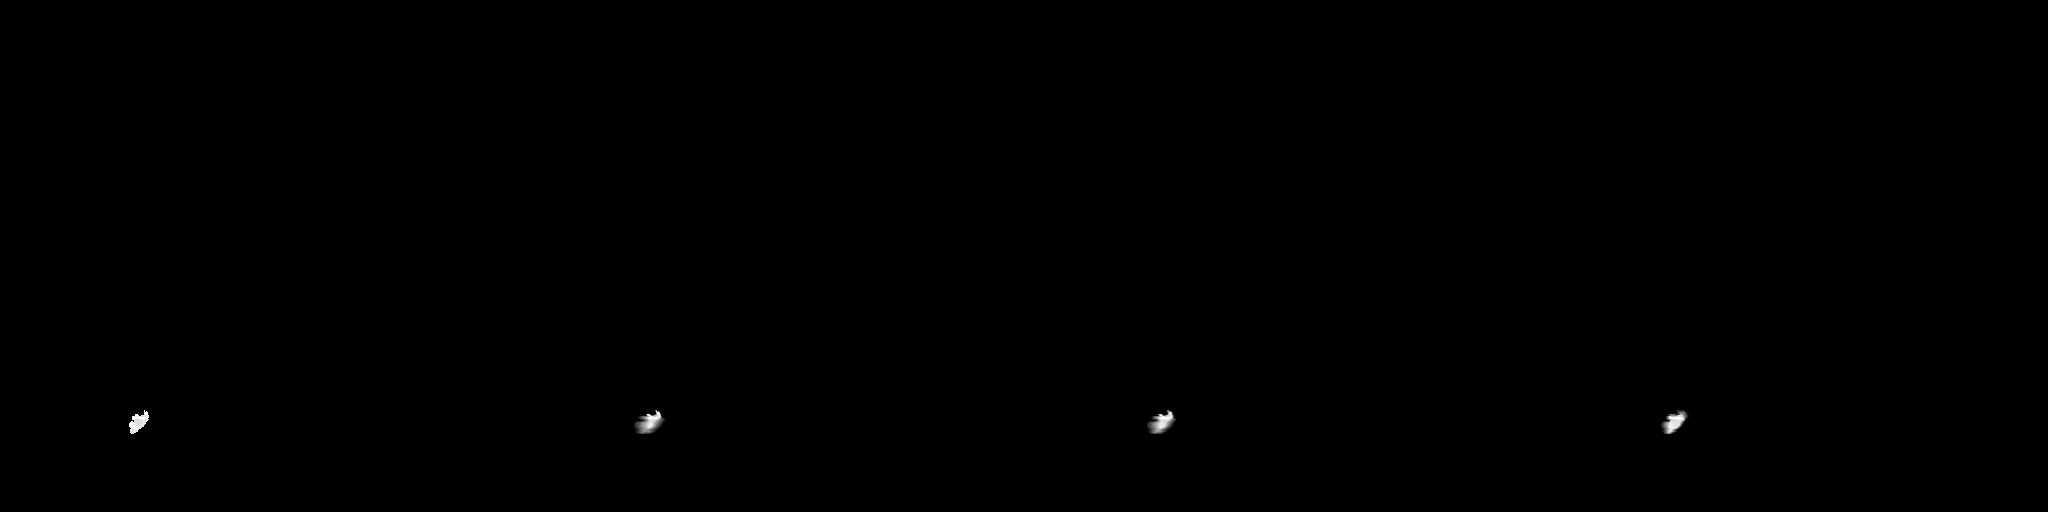

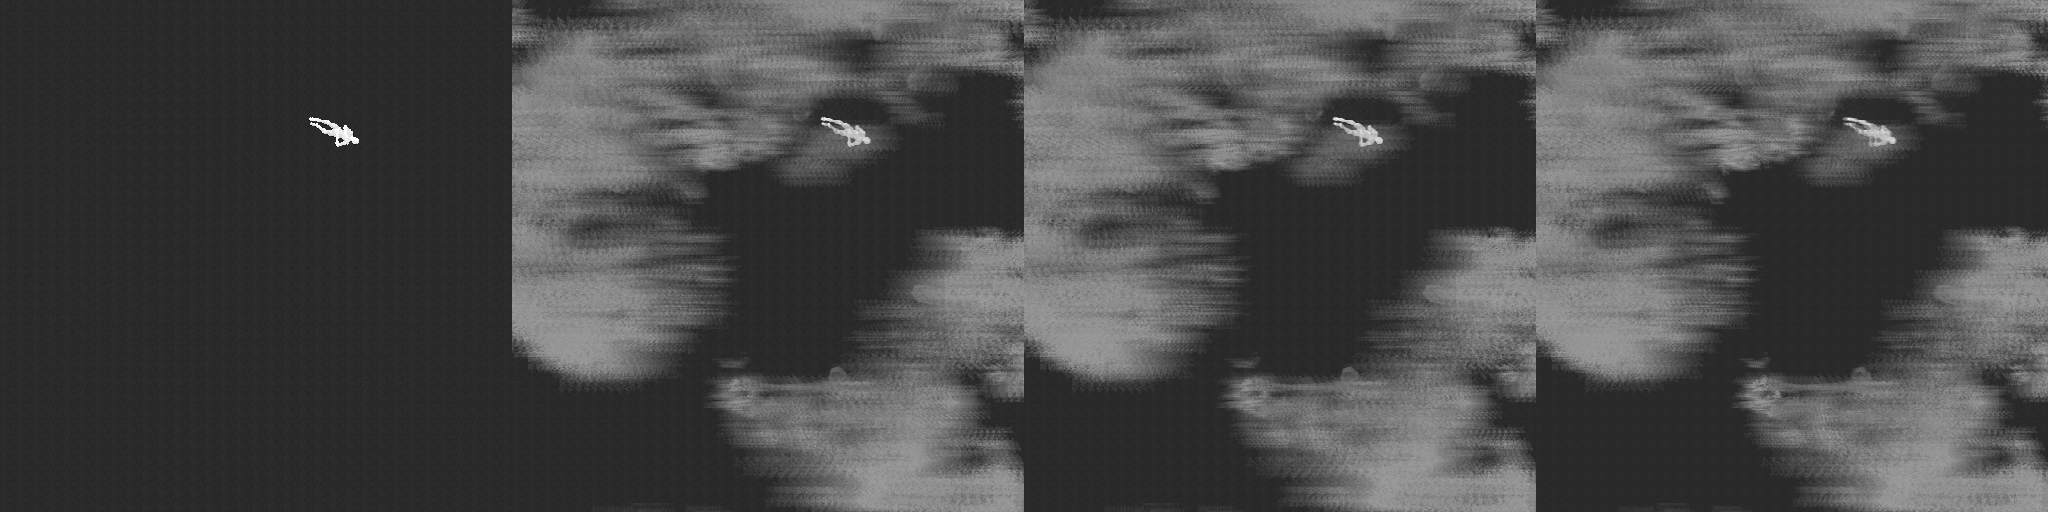

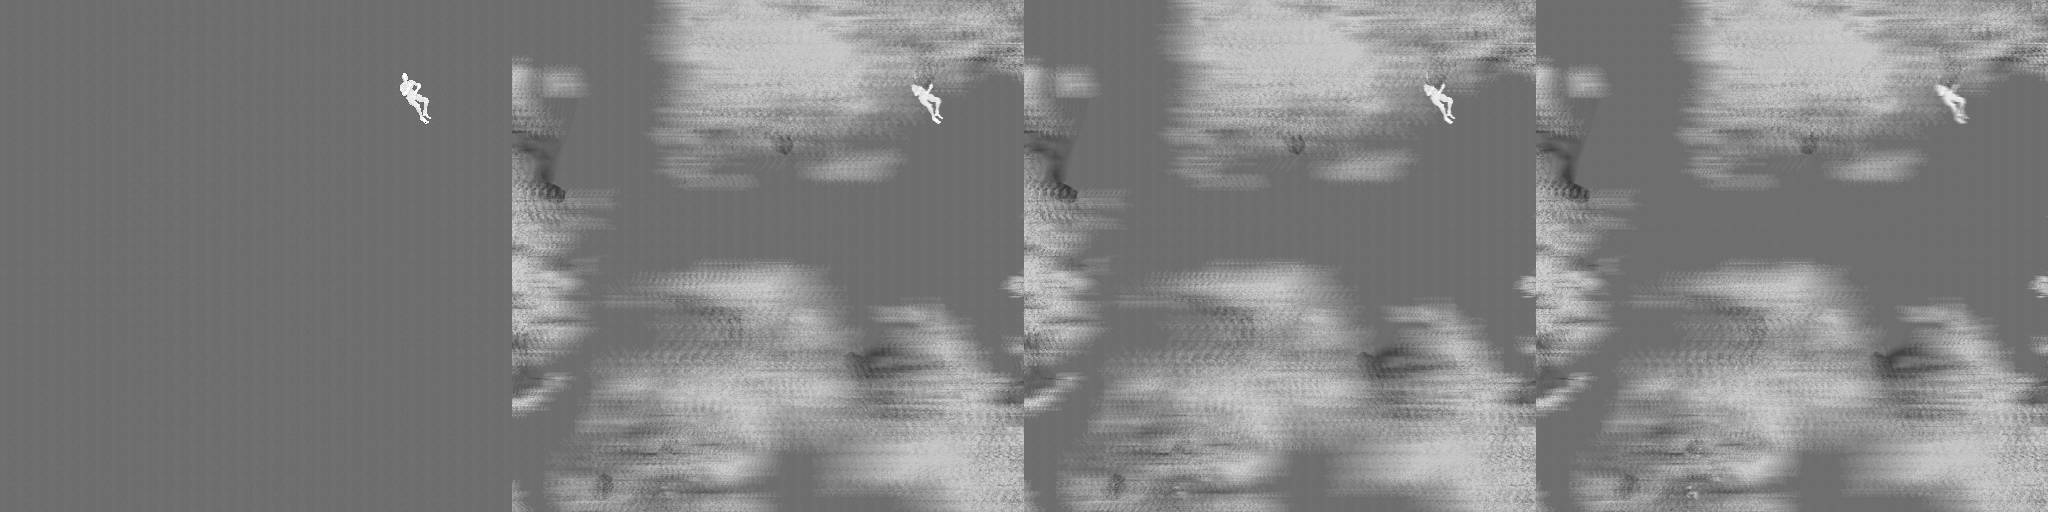

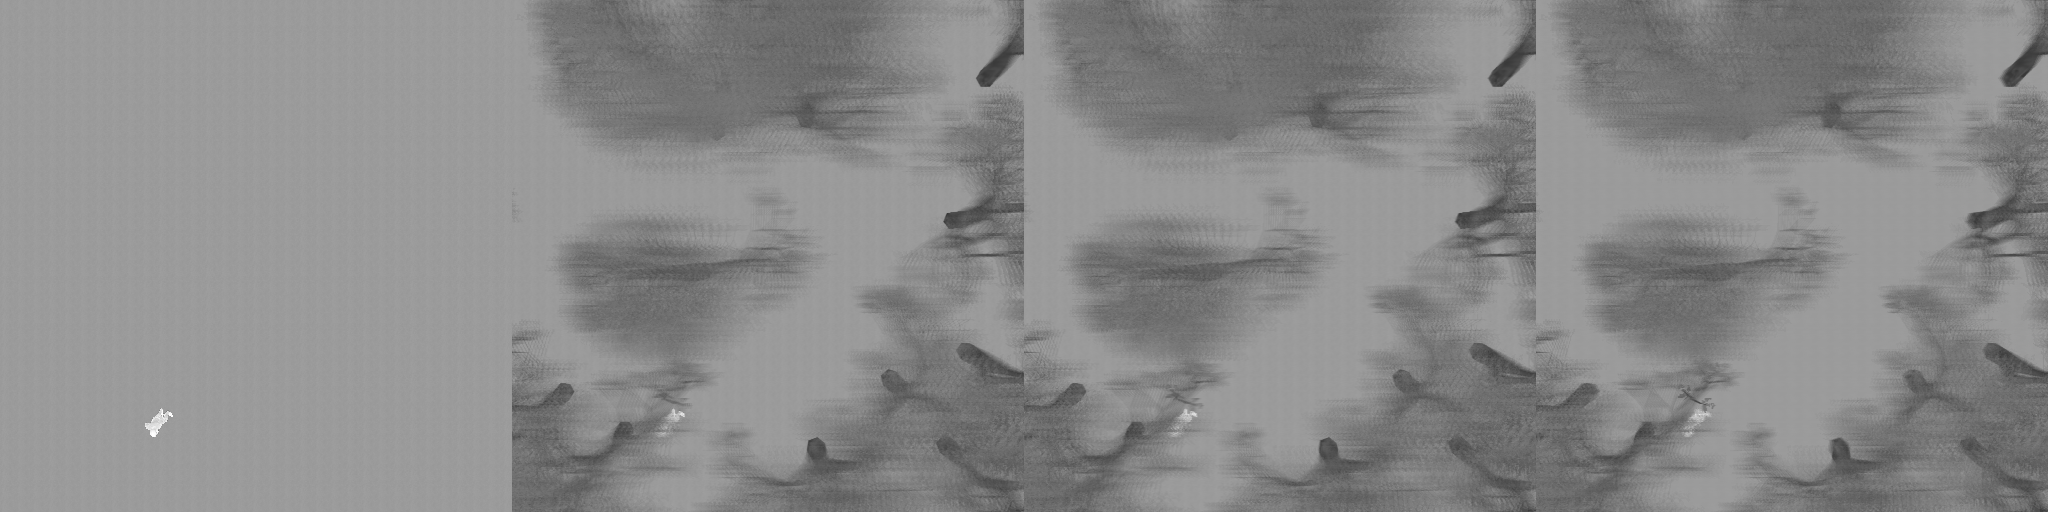

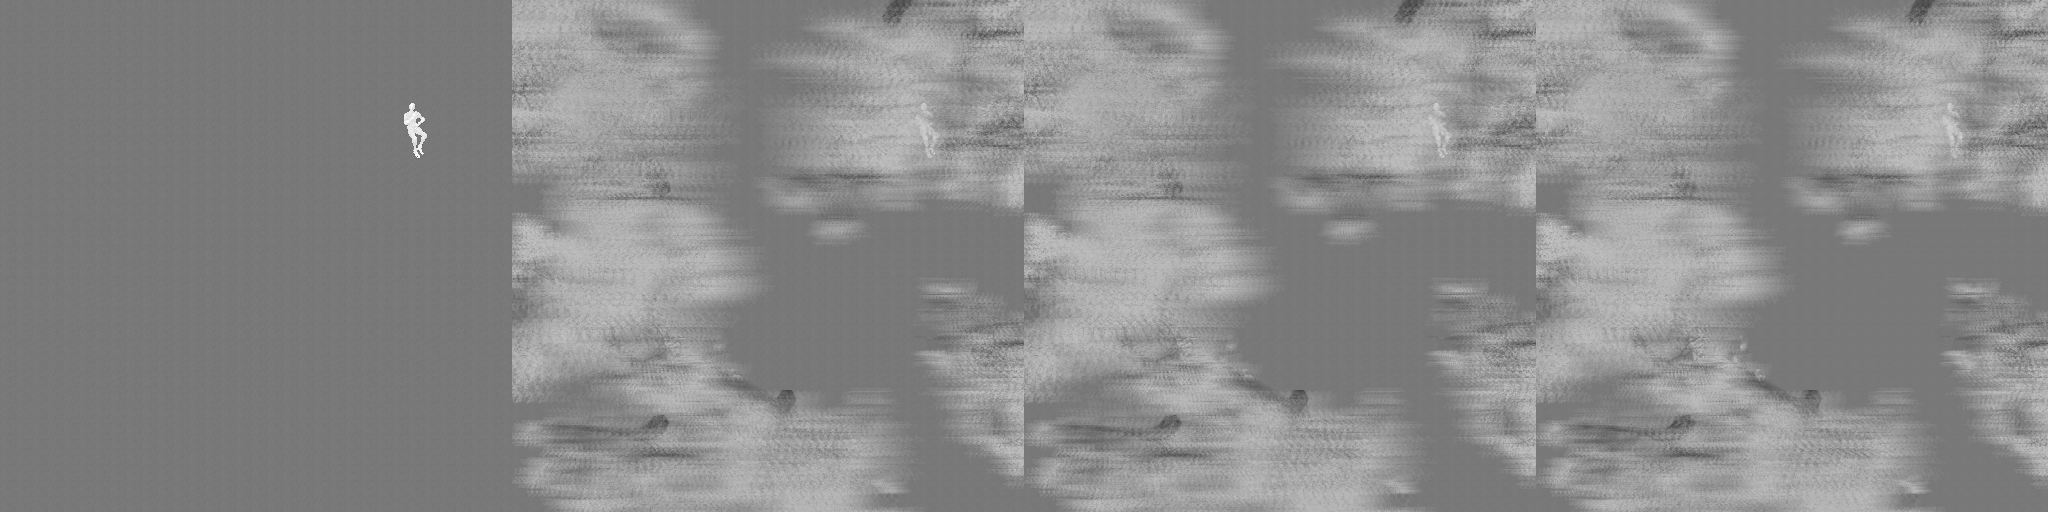

In [44]:
plot_dataset(dataset, n_images=5)

In [45]:
train_loader, test_loader = aos_dataloader(dataset, train_ratio=0.9)

In [46]:
train_loader, test_loader = get_aos_loaders(
    train_ratio=0.5,
    train_batch_size=1,
    test_batch_size=1,
    shuffle=False,
    patch_size=[100, 100],
    dataset_folder=G_DATASET_LOCATION
)

In [47]:
feature, label = next(iter(train_loader))
print(feature.shape)
print(label.shape)

torch.Size([1, 3, 100, 100])
torch.Size([1, 1, 100, 100])


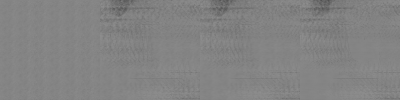

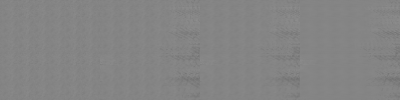

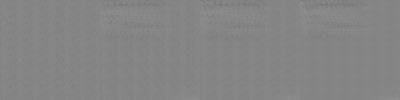

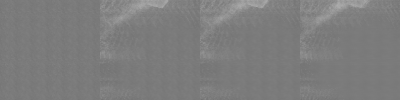

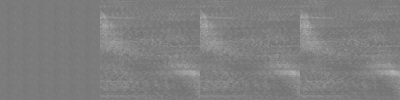

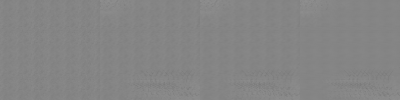

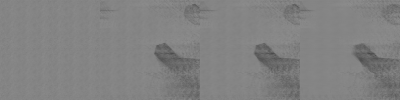

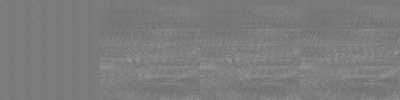

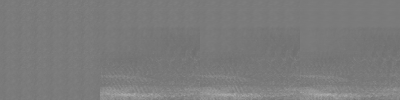

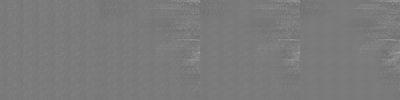

In [48]:
plot_dataloader(train_loader, n_images=10)